In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
import pandas as pd
from swmm_api import read_inp_file
from envs import get_env
env = get_env('shunqing')()
from utilities import get_inp_files

In [ ]:
cwd = './results/shunqing/'
files = [file for file in os.listdir(cwd) if file.endswith('.npy')]
events = list(set(['_'.join(file.split('_')[:2]) for file in files]))


In [3]:
event = 'bpswmm_137'
NN = np.load(os.path.join(cwd,event+'_true_NN.npy'))
STGCN = np.load(os.path.join(cwd,event+'_true_STGCN.npy'))
CNN =np.load(os.path.join(cwd,event+'_true_CNN.npy'))
SWMM = np.load(os.path.join(cwd,event+'_true.npy'))

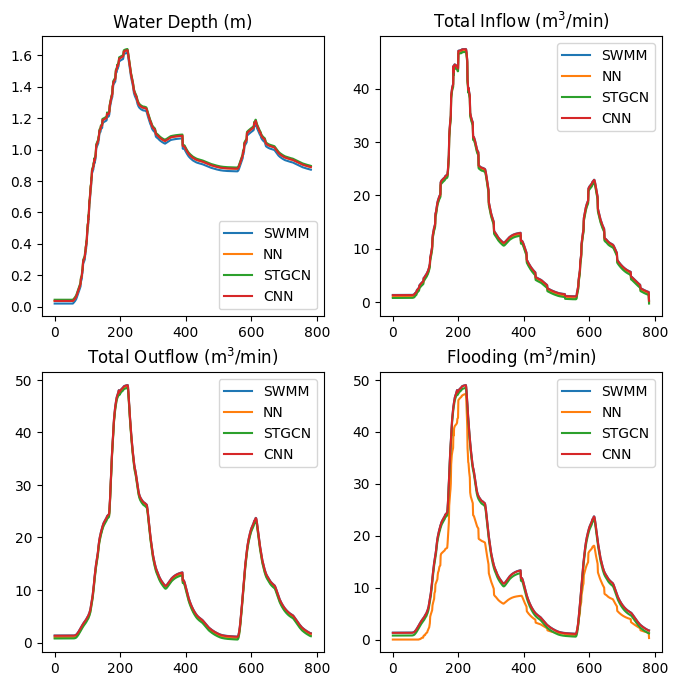

In [37]:
import matplotlib.pyplot as plt
import pandas as pd

fig,((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2,figsize=(8,8))
seq = -1
axes = [ax1,ax2,ax3,ax4]
titles = ['Water Depth (m)','Total Inflow ($\mathregular{m^3}$/min)','Total Outflow ($\mathregular{m^3}$/min)','Flooding ($\mathregular{m^3}$/min)']
for idx,(ax,title) in enumerate(zip(axes,titles)):
    if idx == len(axes)-1:
        idx = -1
    ax.plot(SWMM[:,seq,...].mean(axis=1)[:,idx],label='SWMM')
    ax.plot(NN[:,seq,...].mean(axis=1)[:,idx],label='NN')    
    ax.plot(STGCN[:,seq,...].mean(axis=1)[:,idx],label='STGCN')
    ax.plot(CNN[:,seq,...].mean(axis=1)[:,idx],label='CNN')
    ax.legend()
    ax.set_title(title)

plt.show()

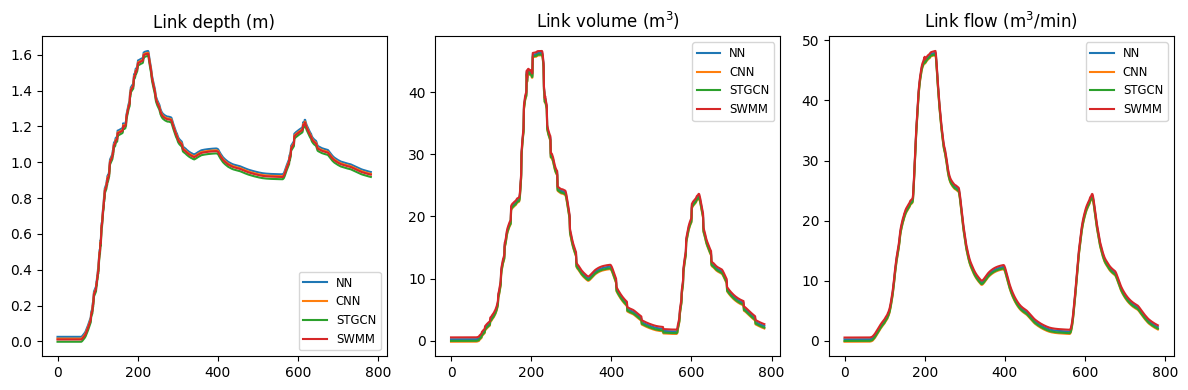

In [4]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 4))
seq = 0
titles = ['Link depth (m)', 'Link volume ($\mathregular{m^3}$)', 'Link flow ($\mathregular{m^3}$/min)']

for idx, ax in enumerate([ax1, ax2, ax3]):
    title = titles[idx]
    ax.plot(NN[:,seq,...].mean(axis=1)[:,idx],label='NN') 
    ax.plot(CNN[:,seq,...].mean(axis=1)[:,idx],label='CNN')
    ax.plot(STGCN[:,seq,...].mean(axis=1)[:,idx],label='STGCN')
    ax.plot(SWMM[:,seq,...].mean(axis=1)[:,idx],label='SWMM')


plt.tight_layout() 
plt.show()

In [5]:
from swmm_api import read_inp_file
inp = read_inp_file('./envs/network/shunqing/shunqing.inp')
links = [k for k in list(inp.CONDUITS)]

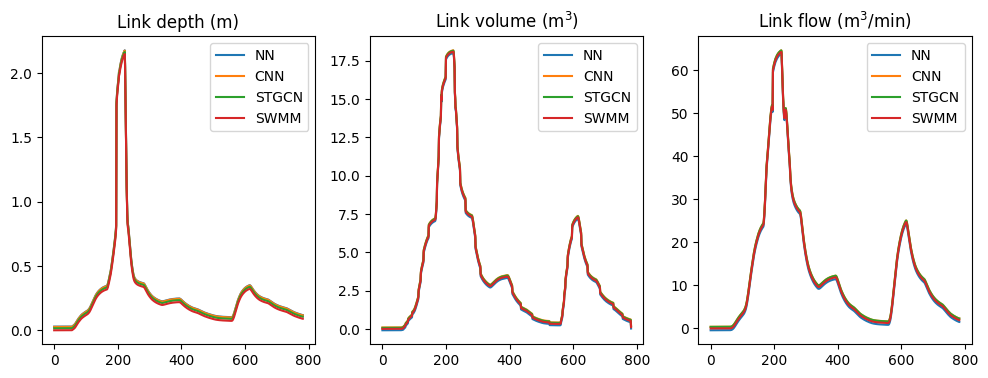

In [40]:
seq = -1
idx = links.index('GQ2')
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 4))

axes = [ax1, ax2, ax3]
titles = ['Link depth (m)', 'Link volume ($\mathregular{m^3}$)', 'Link flow ($\mathregular{m^3}$/min)']

for i, (ax, title) in enumerate(zip(axes, titles)):

    ax.plot(NN[:,seq,idx,i],label='NN')
    ax.plot(CNN[:,seq,idx,i],label='CNN')
    ax.plot(STGCN[:,seq,idx,i],label='STGCN')
    ax.plot(SWMM[:,seq,idx,i],label='SWMM')    
    ax.legend()
    ax.set_title(title)